In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fmb
import missingno as msno

# 2020년 연령별 K-drama 선호도 조사
- 가설 : 4-9세의 K-drama 선호도는 50년대와 상관관계가 높을 것이다.
- 가설 수립 이유 : 4-9세 시청율이 가장 높았던 드라마 제목이 '한번다녀왔습니다.'였기에, 부모와 함께 시청할 것이라 생각하고 50세의 시청율과 비교해보기로 함.                   

## 데이터 병합

In [48]:
# 폴더 안의 파일 찾기
files = os.listdir(".\TN_K_DRAMA")
files

['TN_K_DRAMA_CST_AUDERT_INFO_202001.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202002.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202003.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202004.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202005.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202006.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202007.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202008.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202009.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202010.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202011.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202012.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202101.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202104.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202105.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202107.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202108.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202109.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202110.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202111.csv',
 'TN_K_DRAMA_CST_AUDERT_INFO_202112.csv']

In [49]:
# 필요한 파일 하나씩 데이터 프레임에 저장
df1 = pd.read_csv('.\TN_K_DRAMA\TN_K_DRAMA_CST_AUDERT_INFO_202001.csv')
df2 = pd.read_csv('.\TN_K_DRAMA\TN_K_DRAMA_CST_AUDERT_INFO_202002.csv')
df3 = pd.read_csv('.\TN_K_DRAMA\TN_K_DRAMA_CST_AUDERT_INFO_202003.csv')
df4 = pd.read_csv('.\TN_K_DRAMA\TN_K_DRAMA_CST_AUDERT_INFO_202004.csv')
df5 = pd.read_csv('.\TN_K_DRAMA\TN_K_DRAMA_CST_AUDERT_INFO_202005.csv')
df6 = pd.read_csv('.\TN_K_DRAMA\TN_K_DRAMA_CST_AUDERT_INFO_202006.csv')
df7 = pd.read_csv('.\TN_K_DRAMA\TN_K_DRAMA_CST_AUDERT_INFO_202007.csv')
df8 = pd.read_csv('.\TN_K_DRAMA\TN_K_DRAMA_CST_AUDERT_INFO_202008.csv')
df9 = pd.read_csv('.\TN_K_DRAMA\TN_K_DRAMA_CST_AUDERT_INFO_202009.csv')
df10 = pd.read_csv('.\TN_K_DRAMA\TN_K_DRAMA_CST_AUDERT_INFO_202010.csv')
df11 = pd.read_csv('.\TN_K_DRAMA\TN_K_DRAMA_CST_AUDERT_INFO_202011.csv')
df12 = pd.read_csv('.\TN_K_DRAMA\TN_K_DRAMA_CST_AUDERT_INFO_202012.csv')
k_df = pd.concat([df1, df2, df3, df4, df5, df6, df6, df7, df8, df9, df10, df11, df12] , axis =0)
k_df

,BRDCST_DE,CHNNEL_NM,PROGRM_BEGIN_TIME,PROGRM_END_TIME,PROGRM_NM,PROGRM_DC,BRDCST_TME_NM,PROGRM_BRDCST_AREA_NM,BRDCST_TIME,PROGRM_GENRE_LCLAS_NM,...,MALE_N50S_WTCHNG_RT,MALE_N60S_ABOVE_WTCHNG_RT,FEMALE_4_9YO_WTCHNG_RT,FEMALE_N10S_WTCHNG_RT,FEMALE_N20S_WTCHNG_RT,FEMALE_N30S_WTCHNG_RT,FEMALE_N40S_WTCHNG_RT,FEMALE_N50S_WTCHNG_RT,FEMALE_N60S_ABOVE_WTCHNG_RT,CST_CN
0,20200101,KBS1,203053,205919,꽃길만걸어요,NaN,47회,전국,2826,드라마&영화,...,10.87155,22.44198,2.53181,3.65313,3.49992,3.91898,7.94122,16.80257,28.77101,"강여원역:최윤소,봉천동역:설정환,김지훈역:심지호,황수지역:정유민,왕꼰닙역:양희경,황..."
1,20200101,KBS2,83326,90158,꽃길만걸어요,NaN,46회,전국,2832,드라마&영화,...,0.88039,1.54432,0.02074,0.31538,0.20146,0.20803,0.07472,1.27827,1.79623,"강여원역:최윤소,봉천동역:설정환,김지훈역:심지호,황수지역:정유민,왕꼰닙역:양희경,황..."
2,20200101,KBS2,142127,152323,99억의여자,<13회/14회>,13회/14회,전국,10156,드라마&영화,...,1.07131,0.71185,0.20255,0.00000,0.35307,0.53111,0.67473,0.88160,1.06211,"정서연역:조여정,강태우역:김강우,홍인표역:정웅인,윤희주역:오나라,이재훈역:이지훈,윤..."
3,20200101,KBS2,153014,163125,99억의여자,<15회/16회>,15회/16회,전국,10111,드라마&영화,...,1.44457,1.05063,0.88926,0.02518,0.48745,0.51224,0.61871,1.50653,1.49790,"정서연역:조여정,강태우역:김강우,홍인표역:정웅인,윤희주역:오나라,이재훈역:이지훈,윤..."
4,20200101,KBS2,194916,202238,우아한모녀,NaN,42회,전국,3322,드라마&영화,...,7.69701,17.69207,2.51600,3.26305,4.38414,3.87972,6.83991,13.70226,23.24382,"차미연역:최명길,한유진역:차예련,구해준역:김흥수,구재명역:김명수,서은하역:지수원,홍..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,20201231,WeLike,52000,62455,마이프린세스,NaN,4회,전국,10455,드라마&영화,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00122,"박해영역:송승헌,이설역:김태희,오윤주역:박예진,남정우역:류수영,박동재역:이순재,오기..."
6203,20201231,WeLike,111321,120533,운명과분노,NaN,5회,전국,5212,드라마&영화,...,0.00000,0.00261,0.00000,0.00000,0.00000,0.00515,0.00000,0.00000,0.00393,"태인준역:주상욱,구해라역:이민정,차수현역:소이현,진태오역:이기우,태필운역:고인범,한..."
6204,20201231,WeLike,121927,131641,운명과분노,NaN,6회,전국,5714,드라마&영화,...,0.00000,0.00051,0.00000,0.00835,0.00107,0.00146,0.00000,0.00232,0.00031,"태인준역:주상욱,구해라역:이민정,차수현역:소이현,진태오역:이기우,태필운역:고인범,한..."
6205,20201231,WeLike,200546,205931,운명과분노,NaN,7회,전국,5345,드라마&영화,...,0.00213,0.00000,0.00000,0.00000,0.00329,0.00000,0.00576,0.00118,0.00000,"태인준역:주상욱,구해라역:이민정,차수현역:소이현,진태오역:이기우,태필운역:고인범,한..."


In [50]:
# 폴더 안에 있는 모든 csv 파일 Concat하여 병합
import os
data = pd.DataFrame()
files = os.listdir("./TN_K_DRAMA")
for file in files:
    path = './TN_K_DRAMA/' + file
    add = pd.read_csv(path)
    data = pd.concat([data, add])

In [51]:
# 폴더 안에 있는 csv 파일 중 2020년 파일만 Concat하여 병합
dfs = {}
kdf = pd.DataFrame()
files = os.listdir("./TN_K_DRAMA")
for file in files:
    date = file[-10:-4]
    dfs[date] = pd.read_csv(f"./TN_K_DRAMA/{file}")
    kdf = pd.concat([kdf, dfs[date]])
    if date == '202012':
        break

## 전처리
### DB정보

In [52]:
kdf.describe()

,BRDCST_DE,PROGRM_BEGIN_TIME,PROGRM_END_TIME,BRDCST_TIME,MALE_4_9YO_WTCHNG_RT,MALE_N10S_WTCHNG_RT,MALE_N20S_WTCHNG_RT,MALE_N30S_WTCHNG_RT,MALE_N40S_WTCHNG_RT,MALE_N50S_WTCHNG_RT,MALE_N60S_ABOVE_WTCHNG_RT,FEMALE_4_9YO_WTCHNG_RT,FEMALE_N10S_WTCHNG_RT,FEMALE_N20S_WTCHNG_RT,FEMALE_N30S_WTCHNG_RT,FEMALE_N40S_WTCHNG_RT,FEMALE_N50S_WTCHNG_RT,FEMALE_N60S_ABOVE_WTCHNG_RT
count,7.217700e+04,72177.000000,72177.000000,72177.000000,72177.000000,72177.000000,72177.000000,72177.000000,72177.000000,72177.000000,72177.000000,72177.000000,72177.000000,72177.000000,72177.000000,72177.000000,72177.000000,72177.000000
mean,2.020067e+07,140451.499217,148839.188717,7097.130457,0.139597,0.150100,0.131773,0.172768,0.253120,0.354833,0.468833,0.128876,0.139274,0.154140,0.249442,0.403845,0.490099,0.572996
std,3.421006e+02,69848.195738,70067.231009,3781.242331,0.581799,0.586454,0.493090,0.630658,0.874094,1.343497,2.238566,0.616979,0.591122,0.601953,0.903417,1.392761,1.967181,2.779227
min,2.020010e+07,20000.000000,20002.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.020040e+07,82557.000000,91453.000000,3254.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002560,0.014690,0.000000,0.000000,0.000000,0.000000,0.000000,0.005620,0.018450
50%,2.020070e+07,141143.000000,150711.000000,5922.000000,0.000000,0.000000,0.000000,0.006610,0.018010,0.047330,0.078660,0.000000,0.000000,0.003050,0.012280,0.049910,0.064290,0.091850
75%,2.020093e+07,203324.000000,212623.000000,10515.000000,0.010100,0.040760,0.060800,0.090790,0.163900,0.203370,0.217390,0.000000,0.038610,0.093110,0.146860,0.251610,0.251520,0.257530
max,2.020123e+07,255957.000000,260000.000000,25039.000000,14.248110,13.948470,9.384630,10.552980,17.718320,26.162760,31.772380,15.375140,16.829790,14.482660,17.876300,27.275290,37.457770,38.066930


In [53]:
kdf.shape

(72177, 27)

In [54]:
kdf.tail(2)

,BRDCST_DE,CHNNEL_NM,PROGRM_BEGIN_TIME,PROGRM_END_TIME,PROGRM_NM,PROGRM_DC,BRDCST_TME_NM,PROGRM_BRDCST_AREA_NM,BRDCST_TIME,PROGRM_GENRE_LCLAS_NM,...,MALE_N50S_WTCHNG_RT,MALE_N60S_ABOVE_WTCHNG_RT,FEMALE_4_9YO_WTCHNG_RT,FEMALE_N10S_WTCHNG_RT,FEMALE_N20S_WTCHNG_RT,FEMALE_N30S_WTCHNG_RT,FEMALE_N40S_WTCHNG_RT,FEMALE_N50S_WTCHNG_RT,FEMALE_N60S_ABOVE_WTCHNG_RT,CST_CN
6205,20201231,WeLike,200546,205931,운명과분노,NaN,7회,전국,5345,드라마&영화,...,0.00213,0.00000,0.0,0.0,0.00329,0.0,0.00576,0.00118,0.0,"태인준역:주상욱,구해라역:이민정,차수현역:소이현,진태오역:이기우,태필운역:고인범,한..."
6206,20201231,WeLike,211625,221231,운명과분노,NaN,8회,전국,5606,드라마&영화,...,0.00000,0.00688,0.0,0.0,0.00000,0.0,0.00000,0.00943,0.0,"태인준역:주상욱,구해라역:이민정,차수현역:소이현,진태오역:이기우,태필운역:고인범,한..."


In [55]:
kdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72177 entries, 0 to 6206
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BRDCST_DE                    72177 non-null  int64  
 1   CHNNEL_NM                    72177 non-null  object 
 2   PROGRM_BEGIN_TIME            72177 non-null  int64  
 3   PROGRM_END_TIME              72177 non-null  int64  
 4   PROGRM_NM                    72177 non-null  object 
 5   PROGRM_DC                    4715 non-null   object 
 6   BRDCST_TME_NM                71930 non-null  object 
 7   PROGRM_BRDCST_AREA_NM        72177 non-null  object 
 8   BRDCST_TIME                  72177 non-null  int64  
 9   PROGRM_GENRE_LCLAS_NM        72177 non-null  object 
 10  PROGRM_GENRE_MLSFC_NM        72177 non-null  object 
 11  PROGRM_GENRE_SCLAS_NM        72177 non-null  object 
 12  MALE_4_9YO_WTCHNG_RT         72177 non-null  float64
 13  MALE_N10S_WTCHNG_

### 결측치 제거

<AxesSubplot:>

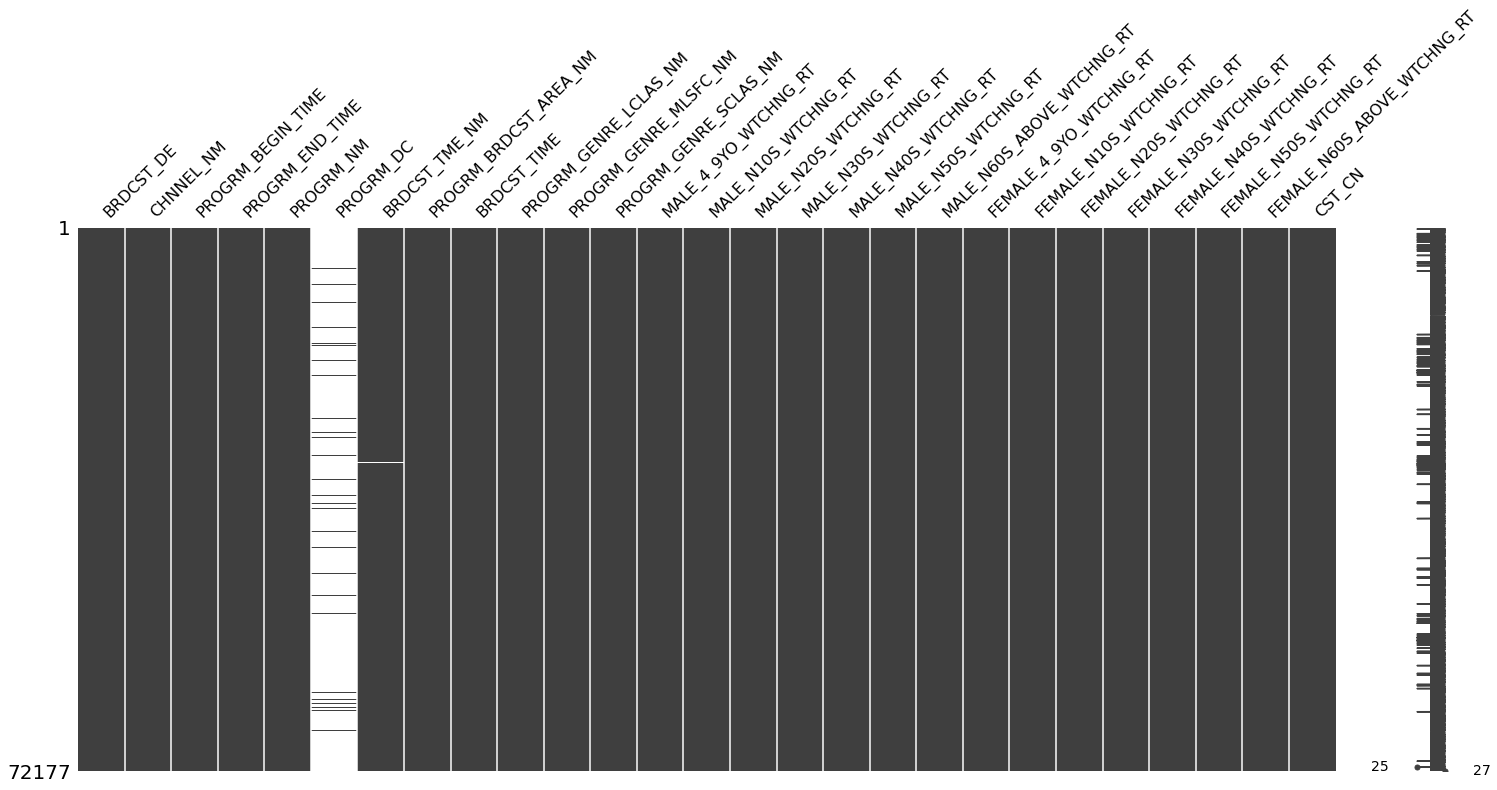

In [56]:
msno.matrix(kdf)

In [57]:
kdf.isnull().sum()

BRDCST_DE                          0
CHNNEL_NM                          0
PROGRM_BEGIN_TIME                  0
PROGRM_END_TIME                    0
PROGRM_NM                          0
PROGRM_DC                      67462
BRDCST_TME_NM                    247
PROGRM_BRDCST_AREA_NM              0
BRDCST_TIME                        0
PROGRM_GENRE_LCLAS_NM              0
PROGRM_GENRE_MLSFC_NM              0
PROGRM_GENRE_SCLAS_NM              0
MALE_4_9YO_WTCHNG_RT               0
MALE_N10S_WTCHNG_RT                0
MALE_N20S_WTCHNG_RT                0
MALE_N30S_WTCHNG_RT                0
MALE_N40S_WTCHNG_RT                0
MALE_N50S_WTCHNG_RT                0
MALE_N60S_ABOVE_WTCHNG_RT          0
FEMALE_4_9YO_WTCHNG_RT             0
FEMALE_N10S_WTCHNG_RT              0
FEMALE_N20S_WTCHNG_RT              0
FEMALE_N30S_WTCHNG_RT              0
FEMALE_N40S_WTCHNG_RT              0
FEMALE_N50S_WTCHNG_RT              0
FEMALE_N60S_ABOVE_WTCHNG_RT        0
CST_CN                            20
d

In [58]:
# 결측값이 있는 열의 내용 탐색 

kdf[['PROGRM_DC', 'BRDCST_TME_NM', 'CST_CN']]

,PROGRM_DC,BRDCST_TME_NM,CST_CN
0,NaN,47회,"강여원역:최윤소,봉천동역:설정환,김지훈역:심지호,황수지역:정유민,왕꼰닙역:양희경,황..."
1,NaN,46회,"강여원역:최윤소,봉천동역:설정환,김지훈역:심지호,황수지역:정유민,왕꼰닙역:양희경,황..."
2,<13회/14회>,13회/14회,"정서연역:조여정,강태우역:김강우,홍인표역:정웅인,윤희주역:오나라,이재훈역:이지훈,윤..."
3,<15회/16회>,15회/16회,"정서연역:조여정,강태우역:김강우,홍인표역:정웅인,윤희주역:오나라,이재훈역:이지훈,윤..."
4,NaN,42회,"차미연역:최명길,한유진역:차예련,구해준역:김흥수,구재명역:김명수,서은하역:지수원,홍..."
...,...,...,...
6202,NaN,4회,"박해영역:송승헌,이설역:김태희,오윤주역:박예진,남정우역:류수영,박동재역:이순재,오기..."
6203,NaN,5회,"태인준역:주상욱,구해라역:이민정,차수현역:소이현,진태오역:이기우,태필운역:고인범,한..."
6204,NaN,6회,"태인준역:주상욱,구해라역:이민정,차수현역:소이현,진태오역:이기우,태필운역:고인범,한..."
6205,NaN,7회,"태인준역:주상욱,구해라역:이민정,차수현역:소이현,진태오역:이기우,태필운역:고인범,한..."


In [59]:
#'PROGRM_DC'는 불필요하다고 판단 -> 삭제
kdf.drop('PROGRM_DC', axis=1, inplace=True)

In [60]:
#'BRDCST_TME_NM'는 추후 사용될 수 있는 데이터로 판단 -> 결측값 '0회'로 채우기
kdf['BRDCST_TME_NM'].fillna('0회', inplace=True)

In [61]:
# 'CST_CN' 출연진 정보 불필요하다고 판단 -> 삭제
kdf.pop('CST_CN')

0       강여원역:최윤소,봉천동역:설정환,김지훈역:심지호,황수지역:정유민,왕꼰닙역:양희경,황...
1       강여원역:최윤소,봉천동역:설정환,김지훈역:심지호,황수지역:정유민,왕꼰닙역:양희경,황...
2       정서연역:조여정,강태우역:김강우,홍인표역:정웅인,윤희주역:오나라,이재훈역:이지훈,윤...
3       정서연역:조여정,강태우역:김강우,홍인표역:정웅인,윤희주역:오나라,이재훈역:이지훈,윤...
4       차미연역:최명길,한유진역:차예련,구해준역:김흥수,구재명역:김명수,서은하역:지수원,홍...
                              ...                        
6202    박해영역:송승헌,이설역:김태희,오윤주역:박예진,남정우역:류수영,박동재역:이순재,오기...
6203    태인준역:주상욱,구해라역:이민정,차수현역:소이현,진태오역:이기우,태필운역:고인범,한...
6204    태인준역:주상욱,구해라역:이민정,차수현역:소이현,진태오역:이기우,태필운역:고인범,한...
6205    태인준역:주상욱,구해라역:이민정,차수현역:소이현,진태오역:이기우,태필운역:고인범,한...
6206    태인준역:주상욱,구해라역:이민정,차수현역:소이현,진태오역:이기우,태필운역:고인범,한...
Name: CST_CN, Length: 72177, dtype: object

<AxesSubplot:>

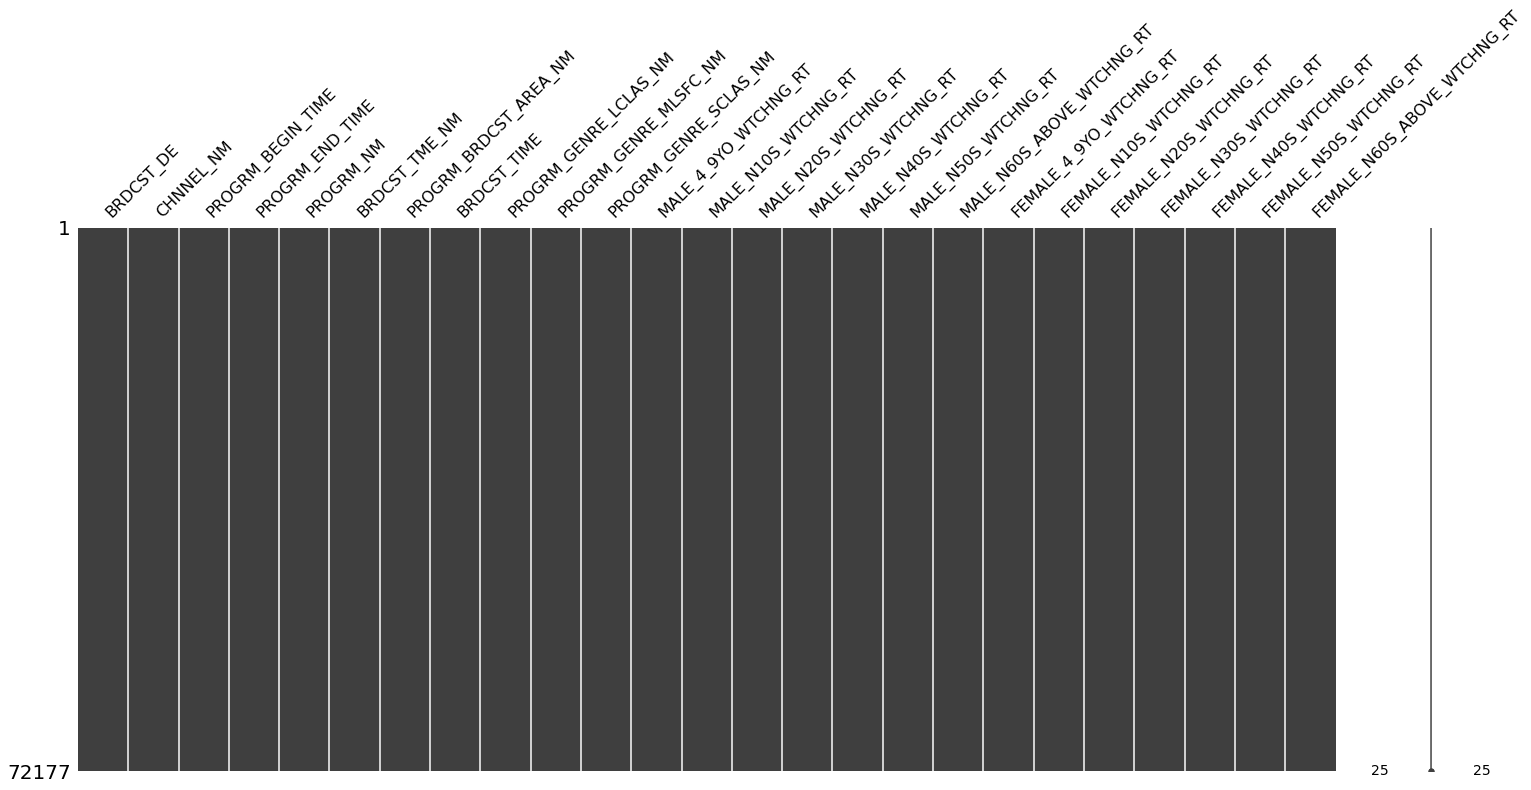

In [62]:
msno.matrix(kdf)

In [63]:
kdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72177 entries, 0 to 6206
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BRDCST_DE                    72177 non-null  int64  
 1   CHNNEL_NM                    72177 non-null  object 
 2   PROGRM_BEGIN_TIME            72177 non-null  int64  
 3   PROGRM_END_TIME              72177 non-null  int64  
 4   PROGRM_NM                    72177 non-null  object 
 5   BRDCST_TME_NM                72177 non-null  object 
 6   PROGRM_BRDCST_AREA_NM        72177 non-null  object 
 7   BRDCST_TIME                  72177 non-null  int64  
 8   PROGRM_GENRE_LCLAS_NM        72177 non-null  object 
 9   PROGRM_GENRE_MLSFC_NM        72177 non-null  object 
 10  PROGRM_GENRE_SCLAS_NM        72177 non-null  object 
 11  MALE_4_9YO_WTCHNG_RT         72177 non-null  float64
 12  MALE_N10S_WTCHNG_RT          72177 non-null  float64
 13  MALE_N20S_WTCHNG_

### 파생변수 생성

In [64]:
# 연령별/성별로 나누어진 시청율에서 성별을 통합하여 새로운 Column 추가
# 시청율이기에 'Sum'을 할지 'mean'을 할지 고민 -> 시청률 = 가구수라고 생각하여 sum으로 결정

kdf['ALL_4_9YO_WTCHNG_RT'] = kdf['MALE_4_9YO_WTCHNG_RT'] + kdf['FEMALE_4_9YO_WTCHNG_RT']
kdf['ALL_N50S_WTCHNG_RT'] = kdf['MALE_N50S_WTCHNG_RT'] + kdf['FEMALE_N50S_WTCHNG_RT']

In [65]:
# '20200101'로 되어있는 데이터를 날짜 형식(2020-01-01)으로 변경

import datetime
kdf['BRDCST_DE'] = kdf['BRDCST_DE'].astype(str)
kdf['BRDCST_DE'] = pd.to_datetime(kdf['BRDCST_DE'])

In [66]:
# 날짜 데이터에서'MONTH'정보 추출하여 새로운 Column 추가

kdf['MONTH'] = kdf['BRDCST_DE'].dt.strftime('%m')

In [67]:
kdf['MONTH'].value_counts()

07    6630
10    6448
04    6300
05    6294
12    6207
01    6110
09    6107
06    6063
08    5758
03    5559
02    5368
11    5333
Name: MONTH, dtype: int64

In [68]:
# MONTH 단위로 groupby 실행

kdf1 = kdf.groupby('MONTH').sum().sort_values('MONTH') 

In [69]:
kdf1.head(2)

,PROGRM_BEGIN_TIME,PROGRM_END_TIME,BRDCST_TIME,MALE_4_9YO_WTCHNG_RT,MALE_N10S_WTCHNG_RT,MALE_N20S_WTCHNG_RT,MALE_N30S_WTCHNG_RT,MALE_N40S_WTCHNG_RT,MALE_N50S_WTCHNG_RT,MALE_N60S_ABOVE_WTCHNG_RT,FEMALE_4_9YO_WTCHNG_RT,FEMALE_N10S_WTCHNG_RT,FEMALE_N20S_WTCHNG_RT,FEMALE_N30S_WTCHNG_RT,FEMALE_N40S_WTCHNG_RT,FEMALE_N50S_WTCHNG_RT,FEMALE_N60S_ABOVE_WTCHNG_RT,ALL_4_9YO_WTCHNG_RT,ALL_N50S_WTCHNG_RT
MONTH,,,,,,,,,,,,,,,,,,,
01,876077019,925052774,41185155,875.40848,1022.72715,769.69165,1261.36132,1697.49096,2578.8320,3361.33940,650.32398,1042.93701,1113.36323,1719.75684,2831.75228,3618.14506,4043.32173,1525.73246,6196.97706
02,741068502,787158212,39353230,1120.87774,1179.45794,786.04720,1184.29797,1829.57829,2634.6846,3299.40034,810.70791,1159.92803,1144.89189,1712.25837,2918.26664,3647.79861,4124.74506,1931.58565,6282.48321


In [70]:
# 인덱스를 칼럼으로 바꾸기
kdf1 = kdf1.reset_index().rename(columns={"index": "MONTH"})

In [71]:
kdf1[['MONTH', 'ALL_4_9YO_WTCHNG_RT', 'ALL_N50S_WTCHNG_RT']]

,MONTH,ALL_4_9YO_WTCHNG_RT,ALL_N50S_WTCHNG_RT
0,01,1525.73246,6196.97706
1,02,1931.58565,6282.48321
2,03,1587.87166,5078.64466
3,04,1766.00003,5446.02134
4,05,1850.25643,5526.94552
5,06,1525.82514,4797.48470
6,07,1479.98335,5037.65137
7,08,1539.94523,4934.06907
8,09,1612.49582,4524.46565
9,10,1491.90585,4252.75675


## 시각화

### 4-9세와 50대의 월별 시청율 비교

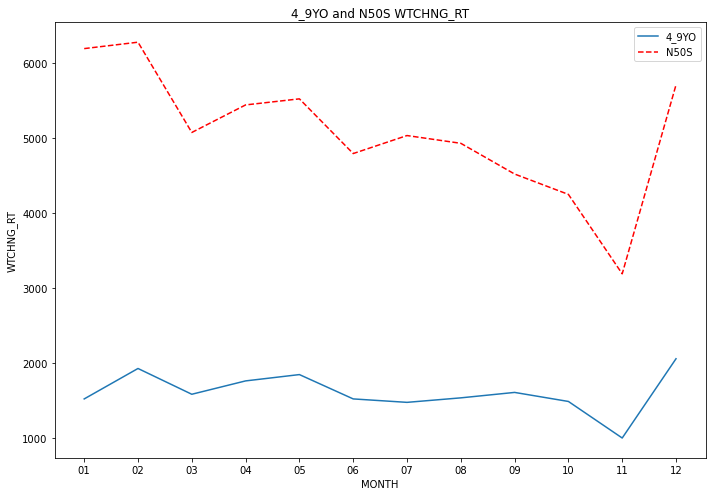

In [72]:
# 선 그래프로 시각화

x = kdf1['MONTH']
y1 = kdf1['ALL_4_9YO_WTCHNG_RT']
y2 = kdf1['ALL_N50S_WTCHNG_RT']

plt.figure(figsize=(10, 7))
plt.title('4_9YO and N50S WTCHNG_RT')

plt.plot(x, y1, label='4_9YO')
plt.plot(x, y2, 'r--', label='N50S')
plt.ylabel('WTCHNG_RT')
plt.xlabel('MONTH')

plt.legend(loc='best')
plt.tight_layout() 
plt.show()

- 두 그래프의 추세가 비슷하기에 세웠던 가설 맞다고 판단

### 다른 연령대의 시청율은 어떨까?

In [73]:
kdf['ALL_N10S_WTCHNG_RT'] = kdf['MALE_N10S_WTCHNG_RT'] + kdf['FEMALE_N10S_WTCHNG_RT']
kdf['ALL_N20S_WTCHNG_RT'] = kdf['MALE_N20S_WTCHNG_RT'] + kdf['FEMALE_N20S_WTCHNG_RT']
kdf['ALL_N30S_WTCHNG_RT'] = kdf['MALE_N30S_WTCHNG_RT'] + kdf['FEMALE_N30S_WTCHNG_RT']
kdf['ALL_N40S_WTCHNG_RT'] = kdf['MALE_N40S_WTCHNG_RT'] + kdf['FEMALE_N40S_WTCHNG_RT']
kdf['ALL_N60S_ABOVE_WTCHNG_RT'] = kdf['MALE_N60S_ABOVE_WTCHNG_RT'] + kdf['FEMALE_N60S_ABOVE_WTCHNG_RT']

In [74]:
kdf2 = kdf.groupby('MONTH').sum().sort_values('MONTH').reset_index().rename(columns={"index": "MONTH"})

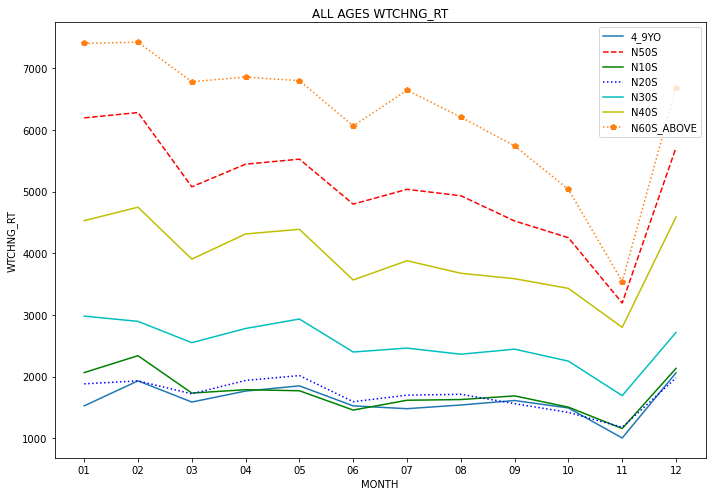

In [75]:
x = kdf2['MONTH']
y1 = kdf2['ALL_4_9YO_WTCHNG_RT']
y2 = kdf2['ALL_N50S_WTCHNG_RT']
y3 = kdf2['ALL_N10S_WTCHNG_RT']
y4 = kdf2['ALL_N20S_WTCHNG_RT']
y5 = kdf2['ALL_N30S_WTCHNG_RT']
y6 = kdf2['ALL_N40S_WTCHNG_RT']
y7 = kdf2['ALL_N60S_ABOVE_WTCHNG_RT']

plt.figure(figsize=(10, 7))
plt.title('ALL AGES WTCHNG_RT')

plt.plot(x, y1, label='4_9YO')
plt.plot(x, y2, 'r--', label='N50S')
plt.plot(x, y3, 'g-', label='N10S')
plt.plot(x, y4, 'b:', label='N20S')
plt.plot(x, y5, 'c-', label='N30S')
plt.plot(x, y6, 'y', label='N40S')
plt.plot(x, y7, 'p:', label='N60S_ABOVE')
plt.ylabel('WTCHNG_RT')
plt.xlabel('MONTH')

plt.legend(loc='best')
plt.tight_layout() 
plt.show()

- 다른 연령대에서 비슷한 추세가 나타나는 것으로 보아, 처음 세웠던 가설과 결과가 크게 유의미하지 않다는 것으로 판단.

- 데이터의 시청율이 Rate(%)값이기에 비율을 합산이나 평균낼 시 적절한 데이터 분석이 불가할 것으로 판단하여, 다른 주제를 추가로 정함.